# MT2507 Mathematical Modelling:  Computing Project Helpsheet

First import our packages:

In [7]:
import matplotlib.pyplot as plt
import numpy as np

## 1. Some initial exploratory work on root finding for functions of one variable.

Let's imagine we want to find a root of the following function:
$$ f(x) = e^{2x+3\sin(x)-1} -1.$$


To do so let's first define this as a function:

In [46]:
def f(x):
    return np.exp(2*x+3*np.sin(x)-1)-1

Now to get a handle on the function let's make a plot. This allows us to find how many roots exist and roughly locate where they lie.

First we select a range of $x$ values to take, and then make a plot with appropriate axes labels and a title too.  Of course the grid is optional, but is helpful for indicating the $y=0$ line.

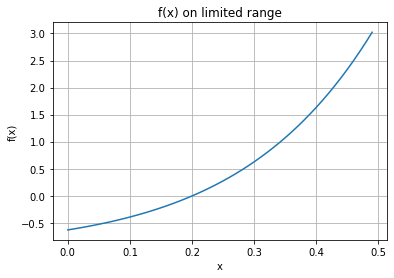

In [47]:
x = np.arange(0.0,0.5,0.01)

plt.plot(x,f(x))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('f(x) on limited range')

plt.grid(True)

From that plot we understand that there is one root and that it's in the interval $(0.1,0.3)$.

To locate the root we will use the Newton-Raphson method which iterates towards a root for a suitable starting value and sufficiently nice function.

To implement the method it would be possible to use numerical derivatives of the function, but in this case let's use the derivative that we could calculate analytically (perhaps using *SymPy* as in the MT2503 work).

In [48]:
def dfdx(x):
  return (2+3*np.cos(x))*np.exp(2*x+3*np.sin(x)-1)

Now we will make a *first attempt* at the scheme itself:

In [49]:
def NRroot(x,f,dfdx):
    for i in range(10):
        x = x - f(x)/dfdx(x)
        print(x)
    return x

If we took an initial guess of $x=0.25$ say then the root would be estimated with this function as:

In [51]:
r = NRroot(0.25,f,dfdx)
print('Root is at, roughly', r)

0.20616024882690306
0.20087647009371423
0.20080811673965684
0.20080810548067488
0.20080810548067457
0.20080810548067457
0.20080810548067457
0.20080810548067457
0.20080810548067457
0.20080810548067457
Root is at, roughly 0.20080810548067457


The above code for implementing the Newton-Raphson scheme is flawed and could be improved.

For example, it does not include any way to determine if we have converged to a root, or other stopping criteria. With this illustrative example we have continued to carry out iterations even though we have already converged to the root to machine accuracy.

## 2. Solving a first order ordinary differential equation numerically

Assume we have the differential equation

$$ \frac{dy}{dx} = f(x,t) = e^{2x+3\sin(x)-1}-1.$$

Let's define the right hand side of this differential equation as a function. In this case $f(x,t)$ doesn't actually include any explicit dependence on $t$ of course.

In [52]:
def f(x,t):
    return np.exp(2*x+3*np.sin(x)-1)-1

Now we will write a second order Runge-Kutta scheme to integrate our function for a single time step:

In [53]:
def RK2step(x,t,h,f):
  k1 = h*f(x,t)
  k2 = h*f(x+k1/2.0,t+h/2.0)
  return x+k2

To integrate the function (solve the ODE) choose a suitable time step $h$, and number of steps to take, $nsteps$ say. The maximum time $t$ reached will be $h \times nsteps$.

For now fix these as:

In [54]:
h = 0.05
nsteps = 30

We also will need to assume an initial condition. Let's take $$x(0)=0.2.$$

In [55]:
x=0.2
t=0.0

Now make some arrays in which to store the solutions, and put our first data point (the initial condition) into those arrays:

In [56]:
xstore = []
tstore = []
xstore.append(x)
tstore.append(t)

Now we use our Runge-Kutta function to advance our solution by the relevant number of steps, each of length $h$:

In [57]:
for n in range(nsteps+1):
  x = RK2step(x,t,h,f)
  t = t+h
  xstore.append(x)
  tstore.append(t)

We now have two arrays which together give us the $t$ and $x$ points on our solution curve. These can be printed out, but it's more illustrative to show their relationship graphically:

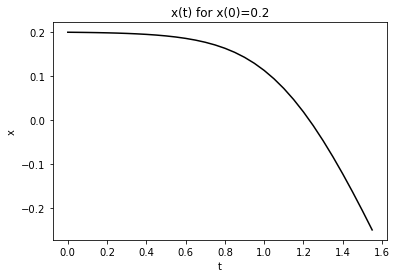

In [59]:
plt.plot(tstore,xstore,'k-')
plt.xlabel('t')
plt.ylabel('x')
plt.title('x(t) for x(0)=0.2')
plt.show()

## 3. Solving systems of first order ordinary differential equations numerically

Now assume we have the following system of coupled first order differential equations:

$$ \frac{dx}{dt} = x(1-y),$$
$$ \frac{dy}{dt} = y(1-x).$$

The right hand side of this system of equations can be defined as a vector valued function. In this case the right hand side isn't actually explicitly depending on time, but to allow for more general situations we'll include that option (should we wish to change the right hand side later).

In [1]:
def f(x,y,t):
    return np.array([x*(1-y),y*(1-x)])

By inspection we know that there are two steady states for this system of ODEs, and these are given by $(0,0)$ and $(1,1)$.  If the steady states were not all known we could write a 2D Newton-Raphson scheme to locate them, and this is one of the tasks in the project.

Here we look at how to integrate the system so that, once an initial condition is specified, solution curves may be found.  We'll use a second order Runge-Kutta scheme to integrate the function for one time step:

In [2]:
def RK2step(x,y,t,h,f):
  k1 = h*f(x,y,t)
  k2 = h*f(x+k1[0]/2.0,y+k1[1]/2.0,t+h/2.0)
  return [x+k2[0],y+k2[1]]

Similarly to the one dimensional case we need to define the time step $h$ and the number of steps to use:

In [3]:
h=0.05
nsteps=25

Next we take an initial condition. Somewhat arbitrarily we'll take the condition that $(x,y)=(0.5,0.4)$ when $t=0$:

In [4]:
t = 0.0
x = 0.5
y = 0.4

Now we solve the coupled ODEs for this initial condition. We do this by advancing the second order Runge-Kutta scheme for several time steps.

We must make sure to have arrays in which to store solutions. Having made those arrays we'll put our initial point on the solution curve, $(0.5,0.4)$, into the arrays:

In [5]:
xstore = []
ystore = []
xstore.append(x)
ystore.append(y)

Now use the second order Runge-Kutta method to advancce the solution by $nsteps$ each of size $h$, storing our points:

In [8]:
for n in range(nsteps+1):
  [x,y] = RK2step(x,y,t,h,f)
  t = t+h
  xstore.append(x)
  ystore.append(y)

We now have two arrays which together give us the $x$ and $y$ points on our solution curve ($t$ values are not explicitly stored, but we know there is a difference of $t=h$ between each point). The arrays for $x$ and $y$ can be printed out, but it's more illustrative to show their relationship graphically:

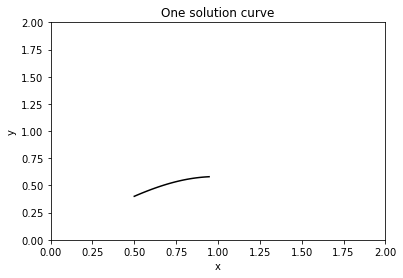

In [9]:
plt.plot(xstore, ystore, 'k-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('One solution curve')
plt.xlim(0,2)
plt.ylim(0,2);


Looking at the curve here, which starts at $(0.5,0.4)$, it looks plausible that the solution trajectory might be heading towards the steady state at $(1,1)$?  Or perhaps it's taking a different path. This could be investigated by integrating for a longer time period, for example. We might also want to add additional solution curves to the plot, and indicate any steady states (e.g. using coloured dots). These would help us build up a *phase plane* for this system of differential equations.